TASK 2: MOVIE RATING PREDICTION WITH PYTHON

BATCH  : JANUARY BATCH B6

DOMAIN : DATA SCIENCE

NAME   : MONISHA H


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder




In [ ]:
movie_df = pd.read_csv(("/content/imdb-india-movies/IMDb Movies India.csv"),encoding='unicode_escape')
movie_df.head(16)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [ ]:
movie_df.shape


(11979, 9)

In [ ]:
movie_df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


DATA CLEANING

In [ ]:
movie_df.duplicated().sum()

6

In [ ]:
movie_df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
movie_df.dropna(inplace=True)
movie_df.isnull().sum()

,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0
Genre_mean_rating,0


In [ ]:
movie_df.drop_duplicates(inplace=True)

In [ ]:
year = px.histogram(movie_df, x = 'Year', histnorm='probability density', nbins = 20)
year.show()

In [ ]:
movie_rating = px.histogram(movie_df, x = 'Rating', histnorm='probability density',nbins = 30)
movie_rating.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'pink')
movie_rating.show()

<ipython-input-12-9b6efb883b08>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





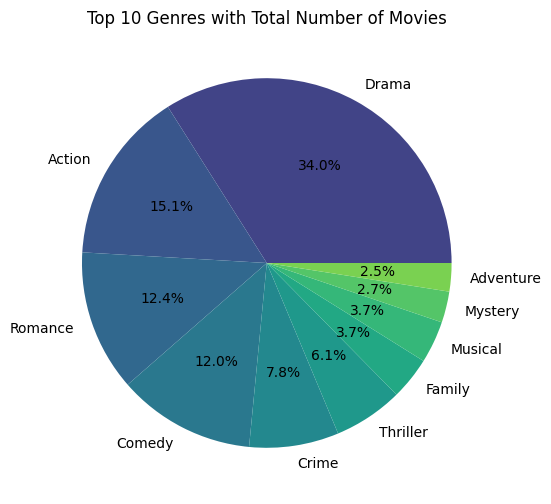

In [ ]:

# Convert all values in the 'Genre' column to strings
movie_df['Genre'] = movie_df['Genre'].astype(str)
movie_df['Genre'] = movie_df['Genre'].str.split(', ')
movie_df = movie_df.explode('Genre')
movie_df['Genre'].fillna(movie_df['Genre'].mode()[0], inplace=True)


top_genres = movie_df['Genre'].value_counts().head(10)

plt.figure(figsize=(6, 6))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_genres)))
# Plot the pie chart
plt.pie(top_genres.values, labels=top_genres.index, autopct='%1.1f%%', colors=colors)

# Add title
plt.title('Top 10 Genres with Total Number of Movies')

# Show plot
plt.show()


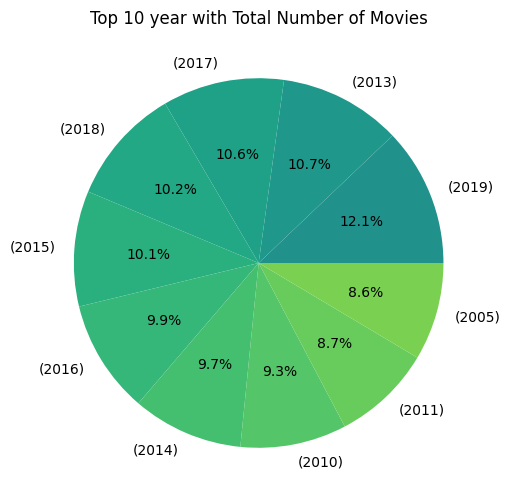

In [ ]:
top_Year = movie_df['Year'].value_counts().head(10)
plt.figure(figsize=(6, 6))
colors = plt.cm.viridis(np.linspace(0.5, 0.8,len(top_Year)))
# Plot the pie chart
plt.pie(top_Year.values, labels=top_Year.index, autopct='%1.1f%%', colors=colors)

# title
plt.title('Top 10 year with Total Number of Movies')
plt.show()


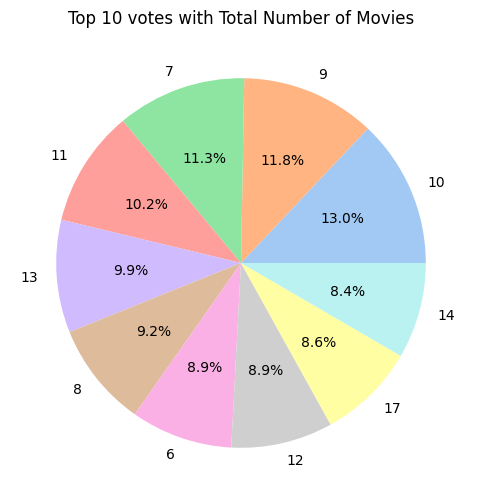

In [ ]:
top_votes = movie_df['Votes'].value_counts().head(10)
plt.figure(figsize=(6, 6))
colors = plt.cm.viridis(np.linspace(0.5, 0.8,len(top_votes)))
# Plot the pie chart
plt.pie(top_votes.values,labels=top_votes.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Top 10 votes with Total Number of Movies')
plt.show()


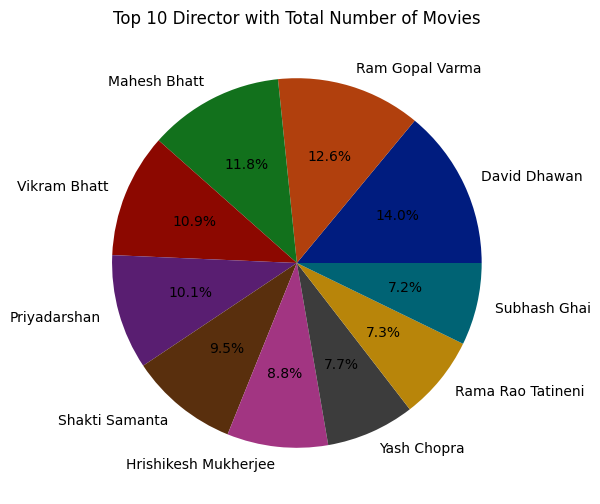

In [ ]:
top_Director= movie_df['Director'].value_counts().head(10)
plt.figure(figsize=(6, 6))
colors = plt.cm.viridis(np.linspace(0.5, 0.8,len(top_Director)))
# Plot the pie chart
plt.pie(top_Director.values,labels=top_Director.index, autopct='%1.1f%%', colors=sns.color_palette('dark'))
plt.title('Top 10 Director with Total Number of Movies')
plt.show()


Relationship between the movie ratings and number of votes

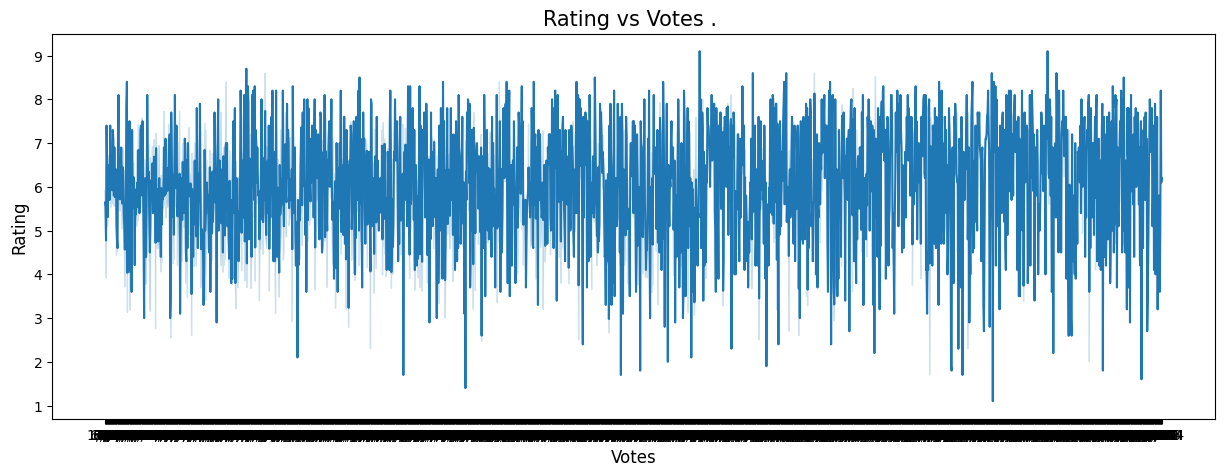

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=movie_df, x='Votes', y='Rating')
plt.xlabel('Votes', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Rating vs Votes . ', fontsize=15)
plt.show()

In [ ]:
movie_counts_by_years = movie_df['Year'].value_counts().reset_index()
movie_counts_by_years.columns = ['Year', 'MovieCount']

movie_counts_by_years = movie_counts_by_years.sort_values(by='Year')
movie_counts_by_years

,Year,MovieCount
87,(1931),3
90,(1932),2
89,(1933),2
88,(1934),3
82,(1935),6
...,...,...
2,(2017),372
3,(2018),358
0,(2019),423
13,(2020),273


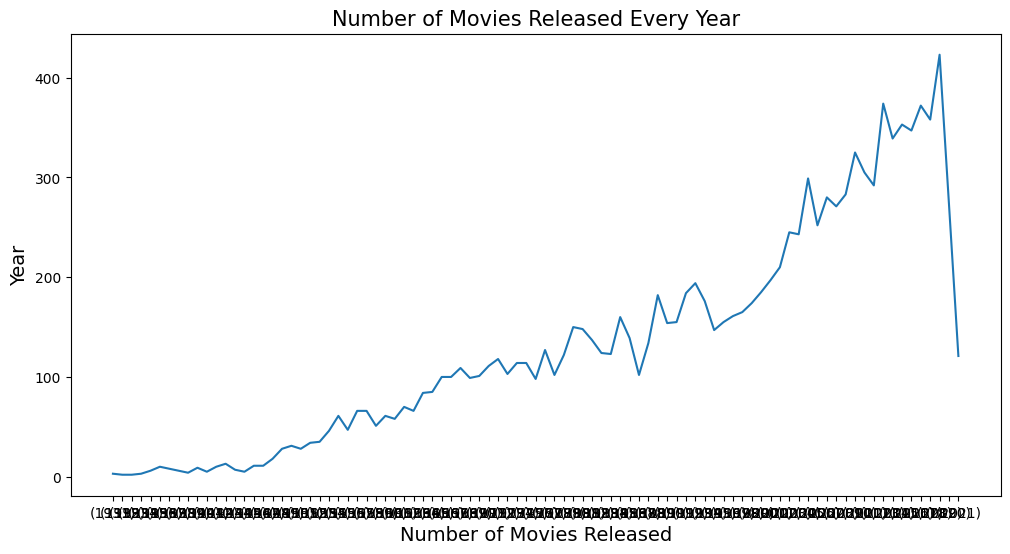

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_counts_by_years, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=15)
plt.xlabel('Number of Movies Released', fontsize=14)
plt.ylabel('Year', fontsize=14)

plt.show()

In [ ]:
movie_df['Duration'] = pd.to_numeric(movie_df['Duration'].str.replace(' min', ''))


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

from sklearn.ensemble import HistGradientBoostingRegressor

In [ ]:
genre_mean_rating = movie_df.groupby('Genre')['Rating'].transform('mean')
movie_df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = movie_df.groupby('Director')['Rating'].transform('mean')
movie_df['Director_encoded'] = director_mean_rating

actor1_mean_rating = movie_df.groupby('Actor 1')['Rating'].transform('mean')
movie_df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = movie_df.groupby('Actor 2')['Rating'].transform('mean')
movie_df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = movie_df.groupby('Actor 3')['Rating'].transform('mean')
movie_df['Actor3_encoded'] = actor3_mean_rating



In [ ]:
X = movie_df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = movie_df['Rating']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
Model =  HistGradientBoostingRegressor()
Model.fit(X_train,y_train)
Model_pred = Model.predict(X_test)

In [ ]:
print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, Model_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, Model_pred))
print('R2 score: ',r2_score(y_test, Model_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.2573636429838997
Mean absolute error:  0.35402257931182807
R2 score:  0.8640478410375789


In [ ]:
print(X.dtypes)
print(X[X['Year'].apply(lambda x: isinstance(x, str))])

Year                  object
Votes                 object
Duration              object
Genre_mean_rating    float64
Director_encoded     float64
Actor1_encoded       float64
Actor2_encoded       float64
Actor3_encoded       float64
dtype: object
         Year Votes Duration  Genre_mean_rating  Director_encoded  \
1      (2019)     8  109 min           6.056744          7.000000   
3      (2019)    35  110 min           5.751042          4.400000   
3      (2019)    35  110 min           5.811087          4.400000   
5      (1997)   827  147 min           5.751042          5.335135   
5      (1997)   827  147 min           6.056744          5.335135   
...       ...   ...      ...                ...               ...   
15503  (1989)    44  125 min           6.056744          6.290476   
15505  (1999)   655  129 min           5.520463          5.175000   
15505  (1999)   655  129 min           6.056744          5.175000   
15508  (1998)    20  130 min           5.520463          4.09062

In [ ]:
X.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019.0,8.0,NaN,6.056744,7.000000,6.850000,7.00,7.00
3,2019.0,35.0,NaN,5.751042,4.400000,5.250000,4.40,4.46
3,2019.0,35.0,NaN,5.811087,4.400000,5.250000,4.40,4.46
5,1997.0,827.0,NaN,5.751042,5.335135,4.793617,5.73,5.93
5,1997.0,827.0,NaN,6.056744,5.335135,4.793617,5.73,5.93


In [ ]:
y.head(5)


,Rating
1,7.0
3,4.4
3,4.4
5,4.7
5,4.7


In [ ]:
data = {'Year': [2019], 'Votes': [36], 'Duration': [111], 'Genre_mean_rating': [5.8], 'Director_encoded': [4.5], 'Actor1_encoded': [5.3], 'Actor2_encoded': [4.5], 'Actor3_encoded': [4.5]}
trail = pd.DataFrame(data)

In [ ]:
rating_predicted = Model.predict(trail)

# Display the predicted result from the Model
print("Predicted Rating:", rating_predicted[0])


Predicted Rating: 4.489486696182034
